<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/thermodynamics_of_natural_gas_hydrates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Thermodynamics of natural gas hydrates
#@markdown This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70)<br><br>
#@markdown Natural gas hydrates are ice-like structures in which gas, most often methane, is trapped inside of water molecules. Unlike the ice we’re all familiar with that’s derived entirely from water, gas hydrates are in fact highly flammable, a property that makes these crystalline structures both an attractive future energy source as well as a potential hazard. 
#@markdown This workbook gives a demonstration of calulcations related to natural gas hydrates. 
%%capture
!pip install neqsim==2.5.35
import neqsim
import time
time.sleep(3)
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

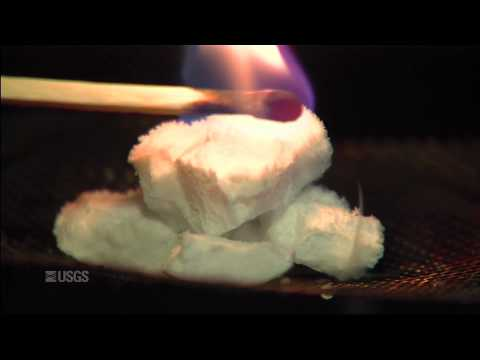

In [2]:
#@title Introduction to Natural gas hydrates
#@markdown This video gives an intriduction to natural gas hydrates
from IPython.display import YouTubeVideo
YouTubeVideo('U46XOoU0DrM', width=600, height=400)



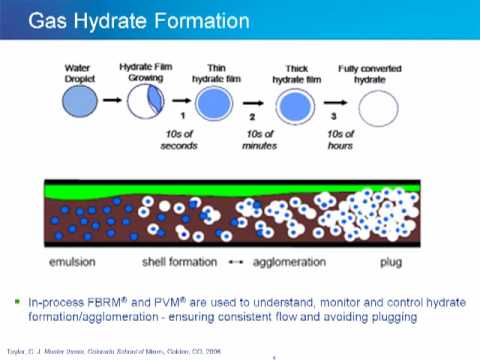

In [3]:
#@markdown This video gives an introduction to natural gas hydrates in oil and gas production
YouTubeVideo('QEJmhokSmZM', width=600, height=400)

# How to calculate hydrate equilibrium temperature
The most accurate predictions of hydrate formation conditions are made using commercial phase equilibria computer programs. These programs are of two types:
* Those which enable the prediction of the pressure and temperature at which hydrates begin to form (incipient hydrate formation programs)
* Those which predict all phases and amounts at higher pressures and lower temperatures than the incipient hydrate formation point (flash programs, or Gibbs energy minimization programs)

See: https://petrowiki.spe.org/Predicting_hydrate_formation

In the following exmaples we use the NeqSim API which predict hydrate equilibrium temperature as well as all phases and amounts at higher pressures and lower temperatures than the incipient hydrate formation point. The CPA-EoS will be used as thermodynamic model.

#Hydrate calculations¶
##How to find the hydrate equilibrium temperature
Hydrate temperatures can be found using the following script for a natural gas and water mixutre.

In [4]:
pressure = 150.0 #@param {type:"number"}
nitrogen = 1.5 #@param {type:"number"}
CO2 = 2.5 #@param {type:"number"}
methane = 95.0  #@param {type:"number"}
ethane = 5.0  #@param {type:"number"}
propane =  2.5 #@param {type:"number"}
ibutane =  1.25 #@param {type:"number"}
nbutane =  1.25 #@param {type:"number"}
water =  10.25 #@param {type:"number"}

fluid1 = fluid('cpa')
fluid1.addComponent("nitrogen", nitrogen)
fluid1.addComponent("CO2", CO2)
fluid1.addComponent("methane", methane)
fluid1.addComponent("ethane", ethane)
fluid1.addComponent("propane", propane)
fluid1.addComponent("i-butane", ibutane)
fluid1.addComponent("n-butane", nbutane)
fluid1.addComponent("water", water)
fluid1.setMixingRule(10)

fluid1.setPressure(pressure, "bara")
hydt(fluid1)

print("Hydrate equilibrium temperature ", fluid1.getTemperature('C'), " C")

Hydrate equilibrium temperature  21.976069045923055  C


##How to draw the hydrate equilibrium line
A hydrate equilibrium line is drawn by calculating a sequence of hydrate equilibrium temperatures.

Text(0, 0.5, 'Pressure [bara]')

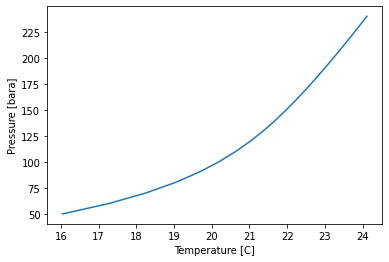

In [5]:
minPressure = 50.0 #@param {type:"number"}
maxPressure = 250.0 #@param {type:"number"}
nitrogen = 1.5 #@param {type:"number"}
CO2 = 2.5 #@param {type:"number"}
methane = 95.0  #@param {type:"number"}
ethane = 5.0  #@param {type:"number"}
propane =  2.5 #@param {type:"number"}
ibutane =  1.25 #@param {type:"number"}
nbutane =  1.25 #@param {type:"number"}
water =  10.0 #@param {type:"number"}

fluid1 = fluid('cpa')
fluid1.addComponent("nitrogen", nitrogen, "mol/sec")
fluid1.addComponent("CO2", CO2,"mol/sec")
fluid1.addComponent("methane", methane, "mol/sec")
fluid1.addComponent("ethane", ethane, "mol/sec")
fluid1.addComponent("propane", propane, "mol/sec")
fluid1.addComponent("i-butane", ibutane, "mol/sec")
fluid1.addComponent("n-butane", nbutane,"mol/sec")
fluid1.addComponent("water", water, "mol/sec")
fluid1.setMixingRule(10)
fluid1.setHydrateCheck(True);
fluid1.setTemperature(280.0)

def hydrateEqTemp(pressure):
    fluid1.setPressure(pressure)
    hydt(fluid1)
    return fluid1.getTemperature('C')

pressure = np.arange(minPressure, maxPressure, 10.0)
temperature = [hydrateEqTemp(P) for P in pressure]

plt.plot(temperature, pressure)
plt.xlabel('Temperature [C]')
plt.ylabel('Pressure [bara]')

# Equilibrium line with inhibitors
A hydrate equilibrium line is drawn by calculating a sequence of hydrate equilibrium temperatures when an inhibitor is used. In the following example MEG (mono ethylene glycol) is used as hydrate inhibitor.

Text(0.5, 1.0, '20.0 mol% MEG')

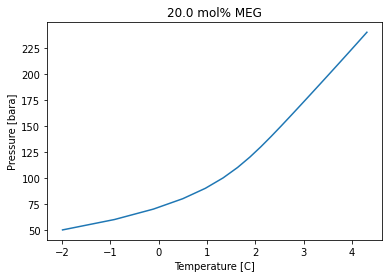

In [6]:
minPressure = 50.0 #@param {type:"number"}
maxPressure = 250.0 #@param {type:"number"}
nitrogen = 1.5 #@param {type:"number"}
CO2 = 2.5 #@param {type:"number"}
methane = 95.0  #@param {type:"number"}
ethane = 5.0  #@param {type:"number"}
propane =  2.5 #@param {type:"number"}
ibutane =  1.25 #@param {type:"number"}
nbutane =  1.25 #@param {type:"number"}
MEG =  20.0 #@param {type:"number"}
water =  80.0 #@param {type:"number"}

fluid1 = fluid('cpa')
fluid1.addComponent("nitrogen", nitrogen, "mol/sec")
fluid1.addComponent("CO2", CO2,"mol/sec")
fluid1.addComponent("methane", methane, "mol/sec")
fluid1.addComponent("ethane", ethane, "mol/sec")
fluid1.addComponent("propane", propane, "mol/sec")
fluid1.addComponent("i-butane", ibutane, "mol/sec")
fluid1.addComponent("n-butane", nbutane,"mol/sec")
fluid1.addComponent("MEG", MEG, "mol/sec")
fluid1.addComponent("water", water, "mol/sec")
fluid1.setMixingRule(10)
fluid1.setHydrateCheck(True);
fluid1.setTemperature(280.0)

def hydrateEqTemp(pressure):
    fluid1.setPressure(pressure)
    hydt(fluid1)
    return fluid1.getTemperature('C')

pressure = np.arange(minPressure, maxPressure, 10.0)
temperature = [hydrateEqTemp(P) for P in pressure]
molFracMEG = MEG/(MEG+water)
plt.plot(temperature, pressure)
plt.xlabel('Temperature [C]')
plt.ylabel('Pressure [bara]')
plt.title((str(molFracMEG*100.0)+ ' mol% MEG'))

#Hydrate equilibrium lines with water with salts
In the following example we will look at the effect of salts in water on calculations of the hydrate equilibrium temperature.

| 0                  | 1          | 2                           | 3                           | 4   | 5   | 6               |
|:-------------------|:-----------|:----------------------------|:----------------------------|:----|:----|:----------------|
|                    | total      | gas                         | aqueous                     |     |     |                 |
| nitrogen           | 6.01191E-3 | 9.96257E-3                  | 4.72804E-5                  |     |     | [mole fraction] |
| CO2                | 6.6131E-3  | 1.09897E-2                  | 5.38131E-6                  |     |     | [mole fraction] |
| methane            | 5.30851E-1 | 8.82445E-1                  | 2.30304E-5                  |     |     | [mole fraction] |
| ethane             | 3.00595E-2 | 4.99682E-2                  | 1.84893E-6                  |     |     | [mole fraction] |
| propane            | 9.01786E-3 | 1.49907E-2                  | 1.50943E-7                  |     |     | [mole frac

Text(0.5, 1.0, 'hydrate equilibrium temperature (water with salt)')

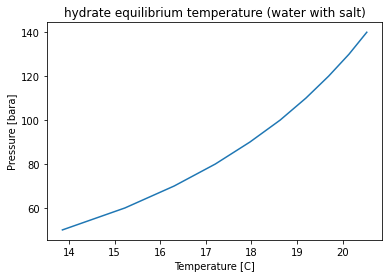

In [14]:
#@title  Calculation of mineral scale in oil and gas production
from neqsim.thermo import fluid, TPflash, checkScalePotential

minPressure = 50.0 #@param {type:"number"}
maxPressure = 150.0 #@param {type:"number"}

nitrogen = 1.0 #@param {type:"number"}
CO2 = 1.1 #@param {type:"number"}
methane = 88.3  #@param {type:"number"}
ethane = 5.0  #@param {type:"number"}
propane =  1.5 #@param {type:"number"}
water =  1.25 #@param {type:"number"}
Naplus =  0.025 #@param {type:"number"}
Clminus =  0.025 #@param {type:"number"}

fluid1 = fluid('Electrolyte-CPA-EoS')
fluid1.addComponent("nitrogen", nitrogen)
fluid1.addComponent("CO2", CO2)
fluid1.addComponent("methane", methane)
fluid1.addComponent("ethane", ethane)
fluid1.addComponent("propane", propane)
fluid1.addComponent("water", water,"kg/sec")
fluid1.addComponent("Na+", Naplus,"mol/sec")
fluid1.addComponent("Cl-", Clminus,"mol/sec")
fluid1.setMixingRule(10)

TPflash(fluid1)
ionCompResults = calcIonComposition(fluid1)

import pandas
printFrame(fluid1)
print("Composition of aqueous phase:")
print(pandas.DataFrame(ionCompResults).to_markdown(index=False))

fluid1.setHydrateCheck(True);
fluid1.setTemperature(280.0)

def hydrateEqTemp(pressure):
    fluid1.setPressure(pressure)
    hydt(fluid1)
    return fluid1.getTemperature('C')

pressure = np.arange(minPressure, maxPressure, 10.0)
temperature = [hydrateEqTemp(P) for P in pressure]

plt.plot(temperature, pressure)
plt.xlabel('Temperature [C]')
plt.ylabel('Pressure [bara]')
plt.title('hydrate equilibrium temperature (water with salt)')